https://twitter.com/genkuroki/status/1763216068490006723

riskdiffhat(a, b, c, d) = 0.10499999999999998
stderr_riskdiffhat(a, b, c, d) = 0.06962892717829279
pvalue_rd_wald(a, b, c, d) = 0.131556078861258
pvalue_rd_wald(a, b, c, d; Δ = 0.2) = 0.17244942526461607


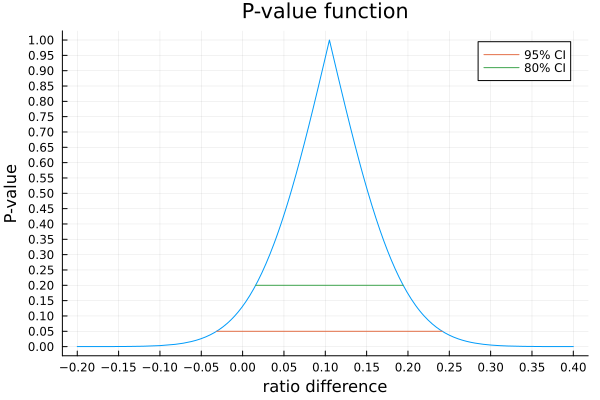

In [1]:
using Distributions
using StatsPlots
default(fmt=:png)

safediv(x, y) = x == 0 ? x : isinf(y) ? zero(y) : x/y

riskdiffhat(a, b, c, d) = safediv(a, a+b) - safediv(c, c+d)

function stderr_riskdiffhat(a, b, c, d)
    m, n = a+b, c+d
    p̂, q̂ = safediv(a, m), safediv(c, n)
    √(safediv(p̂*(1-p̂), m) + safediv(q̂*(1-q̂), n))
end

function pvalue_rd_wald(a, b, c, d; Δ=0)
    RDhat = riskdiffhat(a, b, c, d)
    SEhat_riskdiffhat = stderr_riskdiffhat(a, b, c, d)
    2ccdf(Normal(0, 1), safediv(abs(RDhat - Δ), SEhat_riskdiffhat))
end

function confint_rd_wald(a, b, c, d; α=0.05)
    z = quantile(Normal(), 1-α/2)
    RDhat = riskdiffhat(a, b, c, d)
    SEhat_riskdiffhat = stderr_riskdiffhat(a, b, c, d)
    [RDhat - z*SEhat_riskdiffhat, RDhat + z*SEhat_riskdiffhat]
end

a, b = 58, 22
c, d = 62, 38

@show riskdiffhat(a, b, c, d)
@show stderr_riskdiffhat(a, b, c, d)
@show pvalue_rd_wald(a, b, c, d)
@show pvalue_rd_wald(a, b, c, d; Δ=0.2)

plot(Δ -> pvalue_rd_wald(a, b, c, d; Δ), -0.2, 0.4; label="")
plot!(confint_rd_wald(a, b, c, d; α=0.05), fill(0.05, 2); label="95% CI")
plot!(confint_rd_wald(a, b, c, d; α=0.20), fill(0.20, 2); label="80% CI")
plot!(xguide="ratio difference", yguide="P-value")
plot!(xtick=-2:0.05:2, ytick=0:0.05:1)
title!("P-value function")

In [2]:
riskdiffhat_zou_donner(a, b, c, d) = safediv(a, a+b) - safediv(c, c+d)

function stderr_riskdiffhat_zou_donner(a, b, c, d; u=1)
    m, n = a+b, c+d
    p̂, q̂ = safediv(a, m), safediv(c, n)
    √(safediv(p̂*(1-p̂), m-u) + safediv(q̂*(1-q̂), n-u))
end

function pvalue_rd_zou_donner(a, b, c, d; Δ=0, u=1)
    ((a==0 && d==0) || (b==0 && c==0)) && return 1.0
    RDhat = riskdiffhat_zou_donner(a, b, c, d)
    SEhat_riskdiffhat = stderr_riskdiffhat_zou_donner(a, b, c, d; u)
    Z = safediv((1 - RDhat^2)*abs(atanh(RDhat) - atanh(Δ)), SEhat_riskdiffhat)
    2ccdf(Normal(), abs(Z))
end

function confint_rd_zou_donner(a, b, c, d; α=0.05, u=1)
    z = quantile(Normal(), 1-α/2)
    RDhat = riskdiffhat_zou_donner(a, b, c, d)
    SEhat_riskdiffhat = stderr_riskdiffhat_zou_donner(a, b, c, d; u)
    m = atanh(RDhat)
    d = safediv(z*SEhat_riskdiffhat, 1 - RDhat^2)
    [tanh(m-d), tanh(m+d)]
end

@show pvalue_rd_zou_donner(a, b, c, d)
@show pvalue_rd_zou_donner(a, b, c, d; Δ=0.2)
;

pvalue_rd_zou_donner(a, b, c, d) = 0.1366416912723798
pvalue_rd_zou_donner(a, b, c, d; Δ = 0.2) = 0.1691925373927276


In [3]:
riskratiohat(a, b, c, d) = safediv(a*(c+d), (a+b)*c)
stderr_logriskratiohat(a, b, c, d) = √(1/a - 1/(a+b) + 1/c - 1/(c+d))

function pvalue_rr_wald(a, b, c, d; ρ=1)
    (a+b==0 || c+d==0) && return 1.0
    logRRhat = log(riskratiohat(a, b, c, d))
    SEhat_logRRhat = stderr_logriskratiohat(a, b, c, d)
    2ccdf(Normal(0, 1), safediv(abs(logRRhat - log(ρ)), SEhat_logRRhat))
end

function confint_rr_wald(a, b, c, d; α=0.05)
    (a+b==0 || c+d==0) && return [0, Inf]
    z = quantile(Normal(), 1-α/2)
    RRhat = riskratiohat(a, b, c, d)
    SEhat_logRRhat = stderr_logriskratiohat(a, b, c, d)
    [safemul(exp(-z*SEhat_logRRhat), RRhat), safemul(exp(z*SEhat_logRRhat), RRhat)]
end

@show pvalue_rr_wald(a, b, c, d)
@show pvalue_rr_wald(a, b, c, d; ρ=1.2)
;

pvalue_rr_wald(a, b, c, d) = 0.13346470799490462
pvalue_rr_wald(a, b, c, d; ρ = 1.2) = 0.8040410074146209
